In [69]:
!python3 -m pip install pandas
!python3 -m pip install 'pycaret[full]'
!python3 -m pip install 'pycaret[tuners]'
!python3 -m pip install xgboost
!python3 -m pip install scikit-optimize
!python3 -m pip install joblib
!python3 -m pip install 'ray[tune]'
!python3 -m pip install 'tune[search]'


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of autoviz to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of fugue[dask] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
  Using cached gradio-4.39.0-py3-none-any.whl.metadata (15 kB)
  Using cached gradio_client-1.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached gradio-4.38.1-py3-none-any.whl.metadata (15 kB)
  Using cached gradio_client-1.1.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached gradio-4.38.0-py3-none-any.whl.metadata (15 kB)
  Using cached gradio-4.37.2-py3-none-a

In [96]:
pip install -U git+https://github.com/ray-project/tune-sklearn.git && pip install 'ray[tune]'

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ray-project/tune-sklearn.git to /private/var/folders/4f/9jwcfl7s6sz9pnhpf52ybf500000gn/T/pip-req-build-8ksunnlf
  Running command git clone --filter=blob:none --quiet https://github.com/ray-project/tune-sklearn.git /private/var/folders/4f/9jwcfl7s6sz9pnhpf52ybf500000gn/T/pip-req-build-8ksunnlf
  Resolved https://github.com/ray-project/tune-sklearn.git to commit 75e6a9da1548a8d1a31a7463c997b0612a9211c1
  Preparing metadata (setup.py) ... done
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pycaret.classification import *
import pandas as pd
import numpy as np

<h2>1. 데이터 로드 및 전처리</h2>

In [2]:
# 1. 데이터 로드

data = pd.read_csv('/Users/jeahyukjeong/Desktop/CS_Project/ASD/ASD_pycaret/MCHAT.csv')

# https://github.com/skwgbobf/ASD_Kaggle/blob/main/4.Kaggle1_%20BERT%20Classification.ipynb

# train test 8:2로 나눕니다.
np.random.seed(112)
train, test = np.split(data.sample(frac=1, random_state=42), 
                                     [int(.8*len(data))])

print(len(train), len(test))

122 31


In [3]:
# 2. Preprocess

# Categorical Data 숫자형으로 변환

# https://www.kaggle.com/code/santhoshkumarv/autism-xgboost-shap-values/notebook
from sklearn import preprocessing

# 데이터 칼럼 추출
cat_cols = list(train.select_dtypes('object').columns.values)

# 전처리 과정을 위해서 train과 test 셋들을 잠시 합칩니다.
df = pd.concat([train, test], axis=0)

# 데이터 타입을 모두 숫자형으로 통일
label_encoder = preprocessing.LabelEncoder()
for col in cat_cols:
    df[col]= label_encoder.fit_transform(df[col])

# train test를 다시 8:2로 나눕니다
train = df.iloc[:train.shape[0], :]
test = df.iloc[train.shape[0]:, :]

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject_Id,122.0,1.228369e+09,2.157406e+08,1.023032e+09,1.024041e+09,1.124020e+09,1.324061e+09,1.724023e+09
Gender,122.0,6.721311e-01,4.713726e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Class/ASD,122.0,7.049180e-01,4.579603e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Family_History,121.0,2.479339e-02,1.561415e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
1st_Screening_ASD_Criteria,121.0,6.776860e-01,4.693058e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Congenital_Genetic_Disorder,121.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
History_of_Brain_Damage,121.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Seizure_or_Neurological_disease,121.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SurveyApplicableMonthAge,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Age,122.0,2.525410e+01,3.512814e+00,1.800000e+01,2.200000e+01,2.550000e+01,2.800000e+01,3.000000e+01


In [5]:
import enum
import random
import os

# https://www.kaggle.com/code/santhoshkumarv/autism-xgboost-shap-values/notebook

# 사용할 시드값 변환 함수
def random_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# 시드값, CV fold 개수, 훈련 조기중단 변수 설정
class Config(enum.Enum):
    SEED = 42
    N_FOLDS = 5
    EARLY_STOP = 300

random_seed(Config.SEED.value)

<h2>2. XGBoost Hypter Parameter 설명 </h2> 


XGBoost + SHAP (하이퍼 파라미터 사용) <br>
https://www.kaggle.com/code/santhoshkumarv/autism-xgboost-shap-values/notebook

DMatrix() 사용 불가능 - DMatrix는 모델 학습 속도 상승 효과만 있음 <br>
pycaret에서 early stopping method 사용 불가능 / xgboost에서만 가능 - 모델 학습 속도 사응 효과만 있음 <br>
https://xgboost.readthedocs.io/en/stable/python/python_api.html



In [6]:
# https://www.kaggle.com/code/santhoshkumarv/autism-xgboost-shap-values/notebook

# xgboost 하이퍼파라미터 세팅
xgb_params=  {'n_estimators': 10000,
              'learning_rate': 0.002,
              'objective': 'binary:logistic',
              'eval_metric': 'auc',
              'max_depth': 10,
              'alpha': 0.5108154566815425,
              'gamma': 1.9276236172849432,
              'reg_lambda': 11.40999855634382,
              'colsample_bytree': 0.705851334291963,
              'subsample': 0.8386116751473301,
              'min_child_weight': 2.5517043283716605,
              #'early_stopping_rounds': Config.EARLY_STOP.value, # 학습 도중 모델이 발전이 없을 때 학습을 멈출 수 있게 하는 파라미터들
              #'evals' = [(dtrain, 'train'), (deval, 'eval')],   # pycaret에서 사용 불가능 / xgboost에서만 가능
              #'verbose_eval': 1000, 

}

<h2> 3. Model definition and Training</h2>

Pycaret Classification <br>
https://www.kaggle.com/code/venkatkumar001/apc-3-pycaret-identify-best-algo-s/notebook

학습 모델: XGBoost <br>
evaludation 방식: Stratified K-fold Cross Validation 

In [7]:
# 3. Training

# https://www.kaggle.com/code/venkatkumar001/apc-3-pycaret-identify-best-algo-s/notebook

import xgboost as xgb

# 모델 생성에 사용될 설정
reg = setup(data=train, # 
           target= 'Class/ASD', # columns = [col for col in train.columns if col not in ['ID', 'age_desc', 'Class/ASD'] ] 
           session_id = Config.SEED.value, # random_state = Config.SEED.value
           verbose = False, # silent = True
           fold = Config.N_FOLDS.value, # n_splits = Config.F_FOLDS.value
           data_split_shuffle = True, # shuffle = True
           ignore_features = ['Subject_Id', 'SurveyApplicableMonthAge'] # columns = [col for col in train.columns if col not in ['ID', 'age_desc', 'Class/ASD'] ] 
           )

# 모델 생성: XGBoost + Stratified K-fold Cross-Validation 사용
xgboost = create_model(
    'xgboost',
    **xgb_params # xgboost 모델에 hyper parameter 입력
    )



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9412,0.9250,0.9167,1.0000,0.9565,0.8661,0.8740
3,0.9412,0.9750,0.9167,1.0000,0.9565,0.8661,0.8740
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9765,0.9800,0.9667,1.0000,0.9826,0.9465,0.9496
Std,0.0288,0.0292,0.0408,0.0000,0.0213,0.0656,0.0617


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:

# hyper parameter 튜닝 (Random Grid Search 사용)
tuned_xgboost = tune_model(
    xgboost,
    search_library = 'scikit-optimize',
    search_algorithm = 'bayesian'
    )

# 모델 예측
predict_value = tuned_xgboost.predict(test.drop(['Subject_Id', 'Class/ASD', 'SurveyApplicableMonthAge'], axis = 1)) # shap_preds = tuned_xgboost.predict(test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,1.0000,1.0000,0.9231,0.9600,0.8496,0.8593
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9412,0.9333,0.9167,1.0000,0.9565,0.8661,0.8740
3,0.9412,0.9917,0.9167,1.0000,0.9565,0.8661,0.8740
4,0.9412,1.0000,1.0000,0.9231,0.9600,0.8496,0.8593
Mean,0.9529,0.9850,0.9667,0.9692,0.9666,0.8863,0.8933
Std,0.0235,0.0260,0.0408,0.0377,0.0168,0.0573,0.0537


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


<h2>4. Visualization</h2>

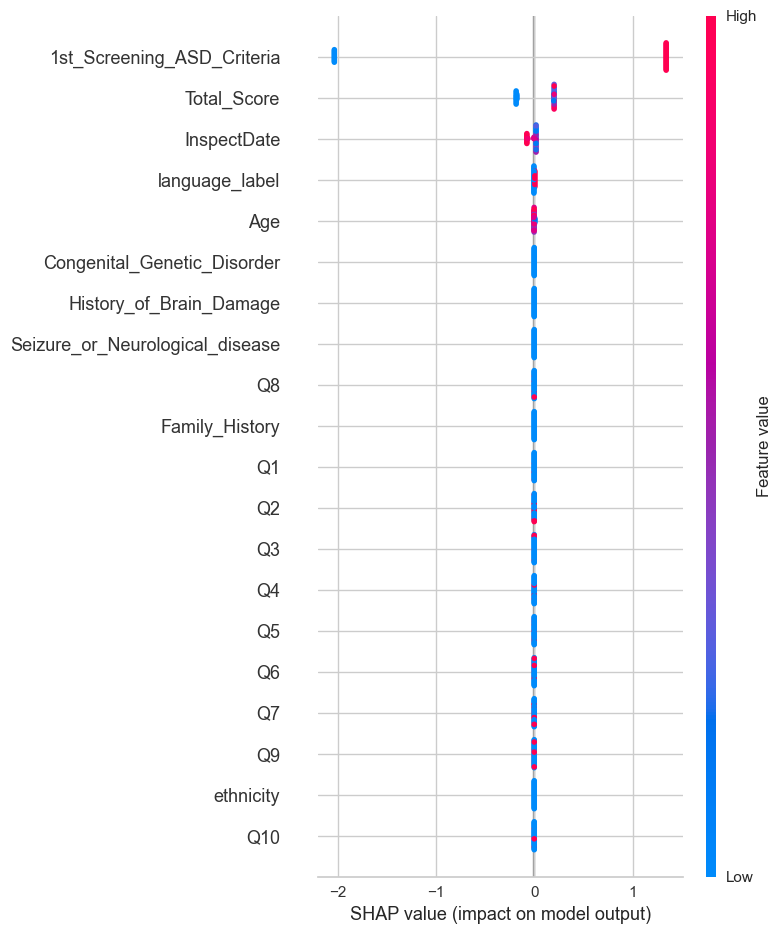

In [9]:
# SHAP 결과
interpret_model(tuned_xgboost, plot = 'summary')
interpret_model(tuned_xgboost, plot = 'msa')

In [11]:
# 학습된 모델로 테스트 셋 예측 결과

assert len(test['Class/ASD']) == len(predict_value)

# Create a boolean Series indicating matches
matches = test['Class/ASD'] == predict_value

# Calculate the number of matches
num_matches = matches.sum()

# Calculate the matching percentage
matching_percentage = (num_matches / len(predict_value)) * 100

print(f"Matching Percentage: {matching_percentage:.2f}%")
predict_model(tuned_xgboost)


Matching Percentage: 83.87%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9730,1.0000,0.9615,1.0000,0.9804,0.9370,0.9388


,Gender,Family_History,1st_Screening_ASD_Criteria,Congenital_Genetic_Disorder,History_of_Brain_Damage,Seizure_or_Neurological_disease,Age,InspectDate,Q1,Q2,...,Q20,Q21,Q22,Q23,Total_Score,ethnicity,language_label,Class/ASD,prediction_label,prediction_score
138,1,0.0,1.0,0.0,0.0,0.0,28.0,72,0,0,...,0,0,0,1,4,0,1.0,1,1,0.9318
42,0,0.0,1.0,0.0,0.0,0.0,24.0,3,1,1,...,0,1,0,0,17,0,0.0,1,1,0.9312
93,0,0.0,1.0,0.0,0.0,0.0,19.0,115,0,0,...,0,0,0,0,0,0,0.0,1,1,0.8945
61,1,0.0,1.0,0.0,0.0,0.0,21.0,52,0,0,...,0,0,0,1,2,0,1.0,1,1,0.9318
31,0,0.0,0.0,0.0,0.0,0.0,24.0,114,0,0,...,0,0,0,0,0,0,NaN,0,0,0.7775
40,1,0.0,0.0,0.0,0.0,0.0,29.0,121,0,0,...,0,0,0,0,0,0,0.0,0,0,0.7775
32,0,0.0,0.0,0.0,0.0,0.0,27.0,117,0,0,...,0,0,0,0,0,0,0.0,0,0,0.7775
111,1,0.0,1.0,0.0,0.0,0.0,24.0,18,0,1,...,0,1,1,1,16,0,1.0,1,1,0.9318
55,1,0.0,1.0,0.0,0.0,0.0,27.0,40,0,0,...,0,0,0,0,1,0,1.0,1,1,0.9032
22,0,0.0,0.0,0.0,0.0,0.0,30.0,105,1,0,...,0,0,0,0,2,0,0.0,0,0,0.7031
